# PROYECTO FINAL - Grupo 3
Módulo: Modelamiento de Datos I

INTEGRANTES
- Felipe Sanchez Saravia
- Sergio Paucara
- Daniel Sanchez
- Sergio Agreda
- Jose Mita


## Organización de las carpetas

In [12]:
import os

# Lista de carpetas a crear
carpetas = [
    "datalake/1_LANDING_ZONE",
    "datalake/2_CLEAN_ZONE",
    "datalake/3_CONSUMPTION_ZONE"
]

# Crear carpetas
for carpeta in carpetas:
    os.makedirs(carpeta, exist_ok=True)
    print(f"✅ Carpeta creada (o ya existente): {carpeta}")


✅ Carpeta creada (o ya existente): datalake/1_LANDING_ZONE
✅ Carpeta creada (o ya existente): datalake/2_CLEAN_ZONE
✅ Carpeta creada (o ya existente): datalake/3_CONSUMPTION_ZONE


## Exportaciones egun Actividad Economica y Producto por Año y Mes, 1992 - 2025

In [13]:
import openpyxl
import pandas as pd

def procesar_hoja_exportaciones(ruta_excel, nombre_hoja, nombre_csv_salida):
    wb = openpyxl.load_workbook(ruta_excel, data_only=True)
    hoja = wb[nombre_hoja]

    # === Generar encabezados mes-año ===
    columnas = []
    anio_actual = None
    for col in range(3, hoja.max_column + 1):  # desde columna C
        mes = hoja.cell(row=5, column=col).value
        anio = hoja.cell(row=4, column=col).value
        if anio:
            anio_actual = anio
        if mes and anio_actual:
            columnas.append(f"{mes} {anio_actual}")
        else:
            columnas.append(None)

    filas = []
    actividad_actual = None
    ultima_fila_valida = None

    for idx, row in enumerate(hoja.iter_rows(min_row=7, min_col=2, max_col=len(columnas) + 2, values_only=True)):
        producto = row[0]
        if producto is None or str(producto).strip() == "":
            continue

        producto = str(producto).strip()

        if producto.upper() in {"TOTAL", "EXPORTACIONES"}:
            continue

        if producto.isupper():
            actividad_actual = producto
            fila = {"Actividad Económica": actividad_actual, "Producto": actividad_actual}
        else:
            fila = {"Actividad Económica": actividad_actual, "Producto": producto}

        # Agregar valores por cada columna mes-año
        for i, val in enumerate(row[1:]):
            if i < len(columnas) and columnas[i]:
                fila[columnas[i]] = val

        filas.append(fila)

        # Marcar posición si es la fila final esperada
        if producto.upper() == "EFECTOS PERSONALES":
            ultima_fila_valida = len(filas)

    # Truncar DataFrame hasta la última fila válida
    df = pd.DataFrame(filas)
    if ultima_fila_valida is not None:
        df = df.iloc[:ultima_fila_valida]

    # Guardar
    df.to_csv(nombre_csv_salida, index=False, encoding="utf-8-sig")
    print(f"✅ Exportado: {nombre_csv_salida}")


In [14]:
def procesar_hoja_anual_exportaciones(ruta_excel, nombre_hoja, nombre_csv_salida):
    import openpyxl
    import pandas as pd

    wb = openpyxl.load_workbook(ruta_excel, data_only=True)
    hoja = wb[nombre_hoja]

    # === Extraer los años desde fila 4 (indexada como 4) ===
    anios = []
    for col in range(3, hoja.max_column + 1):  # columnas desde la C
        anio = hoja.cell(row=4, column=col).value
        anios.append(str(anio) if anio else None)

    filas = []
    actividad_actual = None
    ultima_fila_valida = None

    for row in hoja.iter_rows(min_row=6, min_col=2, max_col=len(anios) + 2, values_only=True):
        producto = row[0]
        if producto is None or str(producto).strip() == "":
            continue

        producto = str(producto).strip()

        if producto.upper() in {"TOTAL", "EXPORTACIONES"}:
            continue

        if producto.isupper():
            actividad_actual = producto
            fila = {"Actividad Económica": actividad_actual, "Producto": actividad_actual}
        else:
            fila = {"Actividad Económica": actividad_actual, "Producto": producto}

        for i, val in enumerate(row[1:]):
            if i < len(anios) and anios[i]:
                fila[anios[i]] = val

        filas.append(fila)

        if producto.upper() == "EFECTOS PERSONALES":
            ultima_fila_valida = len(filas)

    df = pd.DataFrame(filas)
    if ultima_fila_valida is not None:
        df = df.iloc[:ultima_fila_valida]

    df.to_csv(nombre_csv_salida, index=False, encoding="utf-8-sig")
    print(f"✅ Exportado: {nombre_csv_salida}")


### Obtener reportes

In [15]:
ruta_excel = "datalake/1_LANDING_ZONE/Bolivia - Exportaciones segun Actividad Economica y Producto por Año y Mes, 1992 - 2025.xlsx"

# Hojas mensuales
mensuales = [
    ("ExpActProdMes 92-25 Valor", "datalake/2_CLEAN_ZONE/expactprodmes_92_25_valor.csv"),
    ("ExpActProdMes 92-25 Peso",  "datalake/2_CLEAN_ZONE/expactprodmes_92_25_peso.csv")
]

# Hojas anuales
anuales = [
    ("ExpActProdAño 92-25 Valor", "datalake/2_CLEAN_ZONE/expactprodaño_92_25_valor.csv"),
    ("ExpActProdAño 92-25 Peso",  "datalake/2_CLEAN_ZONE/expactprodaño_92_25_peso.csv")
]

# Ejecutar para mensuales
for hoja, salida in mensuales:
    procesar_hoja_exportaciones(ruta_excel, hoja, salida)

# Ejecutar para anuales
for hoja, salida in anuales:
    procesar_hoja_anual_exportaciones(ruta_excel, hoja, salida)



✅ Exportado: datalake/2_CLEAN_ZONE/expactprodmes_92_25_valor.csv
✅ Exportado: datalake/2_CLEAN_ZONE/expactprodmes_92_25_peso.csv
✅ Exportado: datalake/2_CLEAN_ZONE/expactprodaño_92_25_valor.csv
✅ Exportado: datalake/2_CLEAN_ZONE/expactprodaño_92_25_peso.csv


## Exportaciones segun Pais de Destino por Año y Mes, 1992 - 2025

In [16]:
def procesar_hoja_paises_mensual(ruta_excel, nombre_hoja, nombre_csv_salida):
    import openpyxl
    import pandas as pd

    wb = openpyxl.load_workbook(ruta_excel, data_only=True)
    hoja = wb[nombre_hoja]

    # === Construir encabezados Mes Año ===
    columnas = []
    anio_actual = None
    for col in range(3, hoja.max_column + 1):  # desde columna C
        mes = hoja.cell(row=5, column=col).value
        anio = hoja.cell(row=4, column=col).value
        if anio:
            anio_actual = anio
        if mes and anio_actual:
            columnas.append(f"{mes} {anio_actual}")
        else:
            columnas.append(None)

    filas = []
    ultima_fila_valida = None

    for row in hoja.iter_rows(min_row=7, min_col=2, max_col=len(columnas) + 2, values_only=True):
        pais = row[0]
        if pais is None or str(pais).strip() == "":
            continue

        pais = str(pais).strip()
        if pais.upper() in {"TOTAL", "EXPORTACIONES"}:
            continue

        fila = {"País": pais}
        for i, val in enumerate(row[1:]):
            if i < len(columnas) and columnas[i]:
                fila[columnas[i]] = val

        filas.append(fila)

        if pais.upper() == "EFECTOS PERSONALES":
            ultima_fila_valida = len(filas)

    df = pd.DataFrame(filas)
    if ultima_fila_valida is not None:
        df = df.iloc[:ultima_fila_valida]

    df["País"] = df["País"].astype(str)

    df.to_csv(nombre_csv_salida, index=False, encoding="utf-8-sig")
    print(f"✅ Exportado: {nombre_csv_salida}")


In [17]:
def procesar_hoja_paises_anual(ruta_excel, nombre_hoja, nombre_csv_salida):
    import openpyxl
    import pandas as pd

    wb = openpyxl.load_workbook(ruta_excel, data_only=True)
    hoja = wb[nombre_hoja]

    # === Extraer encabezados de años desde fila 4 ===
    anios = []
    for col in range(3, hoja.max_column + 1):
        anio = hoja.cell(row=4, column=col).value
        anios.append(str(anio) if anio else None)

    filas = []
    ultima_fila_valida = None

    for row in hoja.iter_rows(min_row=6, min_col=2, max_col=len(anios) + 2, values_only=True):
        pais = row[0]
        if pais is None or str(pais).strip() == "":
            continue

        pais = str(pais).strip()
        if pais.upper() in {"TOTAL", "EXPORTACIONES"}:
            continue

        fila = {"País": pais}
        for i, val in enumerate(row[1:]):
            if i < len(anios) and anios[i]:
                fila[anios[i]] = val

        filas.append(fila)

        if pais.upper() == "EFECTOS PERSONALES":
            ultima_fila_valida = len(filas)

    df = pd.DataFrame(filas)
    if ultima_fila_valida is not None:
        df = df.iloc[:ultima_fila_valida]

    df["País"] = df["País"].astype(str)

    df.to_csv(nombre_csv_salida, index=False, encoding="utf-8-sig")
    print(f"✅ Exportado: {nombre_csv_salida}")


### Obtener reportes

In [18]:
ruta_excel = "datalake/1_LANDING_ZONE/Bolivia - Exportaciones segun Pais de Destino por Año y Mes, 1992 - 2025.xlsx"

# Hojas mensuales
mensuales = [
    ("ExpPaisesMes 92-25 Valor", "datalake/2_CLEAN_ZONE/exppaisesmes_92_25_valor.csv"),
    ("ExpPaisesMes 92-25 Peso",  "datalake/2_CLEAN_ZONE/exppaisesmes_92_25_peso.csv")
]

# Hojas anuales
anuales = [
    ("ExpPaisesAño 92-25 Valor", "datalake/2_CLEAN_ZONE/exppaisesaño_92_25_valor.csv"),
    ("ExpPaisesAño 92-25 Peso",  "datalake/2_CLEAN_ZONE/exppaisesaño_92_25_peso.csv")
]

# Ejecutar para mensuales
for hoja, salida in mensuales:
    procesar_hoja_paises_mensual(ruta_excel, hoja, salida)

# Ejecutar para anuales
for hoja, salida in anuales:
    procesar_hoja_paises_anual(ruta_excel, hoja, salida)


✅ Exportado: datalake/2_CLEAN_ZONE/exppaisesmes_92_25_valor.csv
✅ Exportado: datalake/2_CLEAN_ZONE/exppaisesmes_92_25_peso.csv
✅ Exportado: datalake/2_CLEAN_ZONE/exppaisesaño_92_25_valor.csv
✅ Exportado: datalake/2_CLEAN_ZONE/exppaisesaño_92_25_peso.csv


# Entrenamiento - EXPORTACIONES SEGÚN PAÍSES DE DESTINO PESO

Epoch 1/50
1848/1848 [==============================] - 5s 2ms/step - loss: 2.8574e-04 - mae: 0.0041 - val_loss: 2.2930e-04 - val_mae: 0.0029
Epoch 2/50
1848/1848 [==============================] - 4s 2ms/step - loss: 1.9702e-04 - mae: 0.0034 - val_loss: 2.4798e-04 - val_mae: 0.0040
Epoch 3/50
1848/1848 [==============================] - 5s 2ms/step - loss: 1.9687e-04 - mae: 0.0033 - val_loss: 1.9280e-04 - val_mae: 0.0024
Epoch 4/50
1848/1848 [==============================] - 5s 3ms/step - loss: 1.8075e-04 - mae: 0.0032 - val_loss: 2.0319e-04 - val_mae: 0.0036
Epoch 5/50
1848/1848 [==============================] - 5s 3ms/step - loss: 1.8073e-04 - mae: 0.0033 - val_loss: 2.2005e-04 - val_mae: 0.0024
Epoch 6/50
1848/1848 [==============================] - 4s 2ms/step - loss: 1.6762e-04 - mae: 0.0030 - val_loss: 1.9262e-04 - val_mae: 0.0031
Epoch 7/50
1848/1848 [==============================] - 4s 2ms/step - loss: 1.6863e-04 - mae: 0.0030 - val_loss: 2.1324e-04 - val_mae: 0.0052
Epoch 

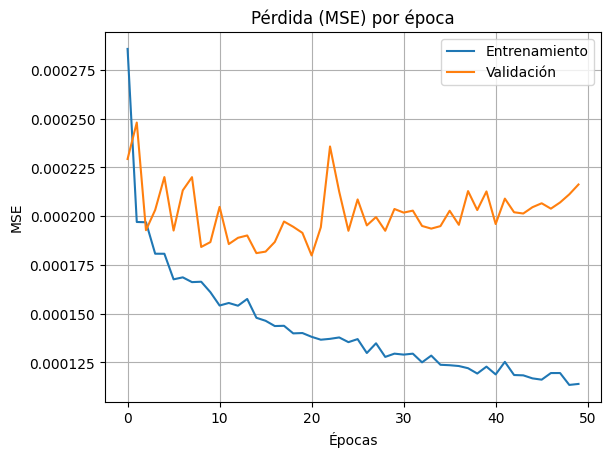

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ----------- Cargar y preparar datos -----------
df = pd.read_csv("datalake/2_CLEAN_ZONE/exppaisesmes_92_25_peso.csv")
df.fillna(0, inplace=True)

series = df.drop(columns=["País"])
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# ----------- Crear muestras (ventanas) -----------
X = []
y = []

ventana = 12  # meses de entrada
for fila in series_scaled:
    for i in range(len(fila) - ventana):
        X.append(fila[i:i+ventana])
        y.append(fila[i+ventana])

X = np.array(X)
y = np.array(y)

# ----------- Dividir datos -----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Definir modelo de regresión -----------
model = Sequential([
    Input(shape=(ventana,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # salida: un único valor (el siguiente mes)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ----------- Entrenar modelo -----------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# ----------- Guardar modelo -----------
model.save("datalake/3_CONSUMPTION_ZONE/modelo_regresion_peso.h5")
print("✅ Modelo de regresión guardado como 'modelo_regresion_peso.h5'")

# ----------- Graficar pérdida -----------
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (MSE) por época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


# Entrenamiento - EXPORTACIONES SEGÚN PAÍSES DE DESTINO VALOR

Epoch 1/50
1848/1848 [==============================] - 5s 3ms/step - loss: 0.0013 - mae: 0.0091 - val_loss: 0.0011 - val_mae: 0.0086
Epoch 2/50
1848/1848 [==============================] - 4s 2ms/step - loss: 0.0011 - mae: 0.0080 - val_loss: 0.0012 - val_mae: 0.0070
Epoch 3/50
1848/1848 [==============================] - 4s 2ms/step - loss: 0.0011 - mae: 0.0082 - val_loss: 0.0011 - val_mae: 0.0093
Epoch 4/50
1848/1848 [==============================] - 5s 3ms/step - loss: 0.0011 - mae: 0.0080 - val_loss: 0.0011 - val_mae: 0.0082
Epoch 5/50
1848/1848 [==============================] - 5s 3ms/step - loss: 0.0011 - mae: 0.0081 - val_loss: 0.0012 - val_mae: 0.0074
Epoch 6/50
1848/1848 [==============================] - 5s 2ms/step - loss: 0.0011 - mae: 0.0081 - val_loss: 0.0012 - val_mae: 0.0093
Epoch 7/50
1848/1848 [==============================] - 4s 2ms/step - loss: 0.0011 - mae: 0.0080 - val_loss: 0.0013 - val_mae: 0.0093
Epoch 8/50
1848/1848 [==============================] - 4s 2ms

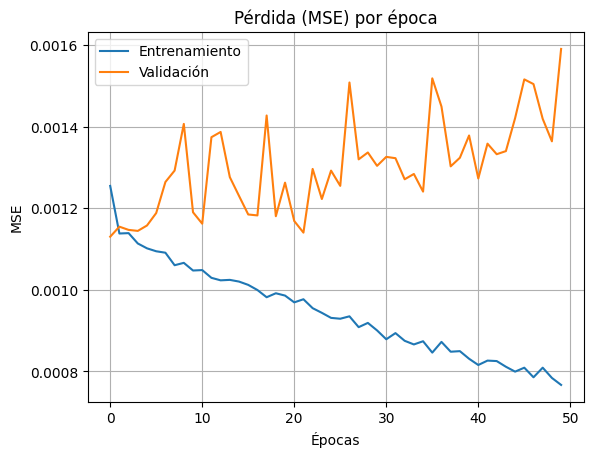

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ----------- Cargar y preparar datos -----------
df = pd.read_csv("datalake/2_CLEAN_ZONE/exppaisesmes_92_25_valor.csv")
df.fillna(0, inplace=True)

series = df.drop(columns=["País"])
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# ----------- Crear muestras (ventanas) -----------
X = []
y = []

ventana = 12  # meses de entrada
for fila in series_scaled:
    for i in range(len(fila) - ventana):
        X.append(fila[i:i+ventana])
        y.append(fila[i+ventana])

X = np.array(X)
y = np.array(y)

# ----------- Dividir datos -----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- Definir modelo de regresión -----------
model = Sequential([
    Input(shape=(ventana,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # salida: un único valor (el siguiente mes)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ----------- Entrenar modelo -----------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# ----------- Guardar modelo -----------
model.save("datalake/3_CONSUMPTION_ZONE/modelo_regresion_valor.h5")
print("✅ Modelo de regresión guardado como 'modelo_regresion_valor.h5'")

# ----------- Graficar pérdida -----------
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (MSE) por época')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
3/3 [==============================] - 1s 119ms/step - loss: 1.0637 - accuracy: 0.6471 - val_loss: 1.0028 - val_accuracy: 0.9444
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 1.0144 - accuracy: 0.8971 - val_loss: 0.9686 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.9796 - accuracy: 0.8971 - val_loss: 0.9307 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 43ms/step - loss: 0.9443 - accuracy: 0.8971 - val_loss: 0.8895 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 25ms/step - loss: 0.9066 - accuracy: 0.8971 - val_loss: 0.8452 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.8676 - accuracy: 0.8971 - val_loss: 0.7989 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.8254 - accuracy: 0.8824 - val_loss: 0.7512 - val_accuracy: 1.0000
Epoch 8/50
3/3 [==========

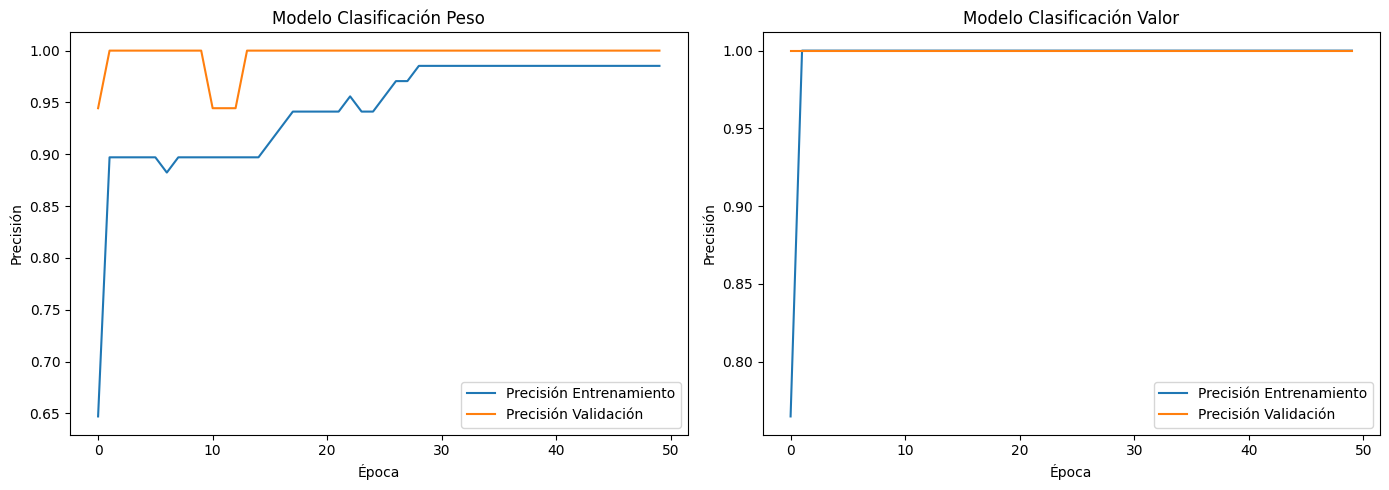

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ----------- Cargar datasets ----------
peso_df = pd.read_csv("datalake/2_CLEAN_ZONE/expactprodmes_92_25_peso.csv")
valor_df = pd.read_csv("datalake/2_CLEAN_ZONE/expactprodmes_92_25_valor.csv")

# ----------- Identificar columnas numéricas ----------
columnas_tiempo = [col for col in peso_df.columns if col not in ['Actividad Económica', 'Producto']]

# ----------- Rellenar NaN con 0 (significa no exportó) ----------
peso_df[columnas_tiempo] = peso_df[columnas_tiempo].fillna(0)
valor_df[columnas_tiempo] = valor_df[columnas_tiempo].fillna(0)

# ----------- Generar etiquetas de tendencia ----------
def generar_etiquetas(df, columnas):
    etiquetas = []
    for _, fila in df.iterrows():
        datos = fila[columnas].values.astype(float)
        if np.all(datos == datos[0]):
            etiquetas.append(1)  # Estable
            continue
        try:
            tendencia = np.polyfit(np.arange(len(datos)), datos, 1)[0]
            if np.isnan(tendencia) or np.isinf(tendencia):
                etiquetas.append(1)
            elif tendencia > 10:
                etiquetas.append(2)  # Crecimiento
            elif tendencia < -10:
                etiquetas.append(0)  # Caída
            else:
                etiquetas.append(1)  # Estable
        except:
            etiquetas.append(1)
    return np.array(etiquetas)

# ----------- Preparar datos ----------
X_peso = peso_df[columnas_tiempo].astype(float).values
X_valor = valor_df[columnas_tiempo].astype(float).values
y_peso = generar_etiquetas(peso_df, columnas_tiempo)
y_valor = generar_etiquetas(valor_df, columnas_tiempo)

# ----------- Escalado ----------
scaler_peso = MinMaxScaler()
scaler_valor = MinMaxScaler()
X_peso = scaler_peso.fit_transform(X_peso)
X_valor = scaler_valor.fit_transform(X_valor)

# ----------- One-hot encoding ----------
y_peso_cat = to_categorical(y_peso, num_classes=3)
y_valor_cat = to_categorical(y_valor, num_classes=3)

# ----------- División ----------
X_train_peso, X_test_peso, y_train_peso, y_test_peso = train_test_split(X_peso, y_peso_cat, test_size=0.2, random_state=42)
X_train_valor, X_test_valor, y_train_valor, y_test_valor = train_test_split(X_valor, y_valor_cat, test_size=0.2, random_state=42)

# ----------- Crear modelo ----------
def crear_modelo(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ----------- Entrenar modelo de PESO ----------
modelo_peso = crear_modelo(X_peso.shape[1])
hist_peso = modelo_peso.fit(X_train_peso, y_train_peso, validation_data=(X_test_peso, y_test_peso), epochs=50, batch_size=32)
modelo_peso.save("datalake/3_CONSUMPTION_ZONE/modelo_clasificacion_peso.h5")

# ----------- Entrenar modelo de VALOR ----------
modelo_valor = crear_modelo(X_valor.shape[1])
hist_valor = modelo_valor.fit(X_train_valor, y_train_valor, validation_data=(X_test_valor, y_test_valor), epochs=50, batch_size=32)
modelo_valor.save("datalake/3_CONSUMPTION_ZONE/modelo_clasificacion_valor.h5")

# ----------- Graficar desempeño ----------
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_peso.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(hist_peso.history['val_accuracy'], label='Precisión Validación')
plt.title('Modelo Clasificación Peso')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_valor.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(hist_valor.history['val_accuracy'], label='Precisión Validación')
plt.title('Modelo Clasificación Valor')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()
